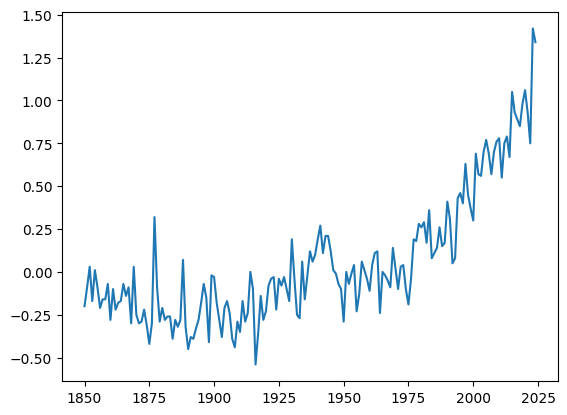

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')
plt.plot(data['Year'], data['Anomaly'])
plt.show()

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [155]:
# load the dataset
dataframe = pd.read_csv('data.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [156]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [157]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

140 35


In [158]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [159]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [160]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [161]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200


/Users/bhagya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


138/138 - 1s - 6ms/step - loss: 0.0198
Epoch 2/200
138/138 - 0s - 461us/step - loss: 0.0070
Epoch 3/200
138/138 - 0s - 457us/step - loss: 0.0070
Epoch 4/200
138/138 - 0s - 456us/step - loss: 0.0068
Epoch 5/200
138/138 - 0s - 457us/step - loss: 0.0065
Epoch 6/200
138/138 - 0s - 452us/step - loss: 0.0063
Epoch 7/200
138/138 - 0s - 456us/step - loss: 0.0064
Epoch 8/200
138/138 - 0s - 456us/step - loss: 0.0062
Epoch 9/200
138/138 - 0s - 456us/step - loss: 0.0061
Epoch 10/200
138/138 - 0s - 457us/step - loss: 0.0061
Epoch 11/200
138/138 - 0s - 459us/step - loss: 0.0060
Epoch 12/200
138/138 - 0s - 460us/step - loss: 0.0059
Epoch 13/200
138/138 - 0s - 463us/step - loss: 0.0060
Epoch 14/200
138/138 - 0s - 469us/step - loss: 0.0059
Epoch 15/200
138/138 - 0s - 471us/step - loss: 0.0059
Epoch 16/200
138/138 - 0s - 472us/step - loss: 0.0059
Epoch 17/200
138/138 - 0s - 485us/step - loss: 0.0059
Epoch 18/200
138/138 - 0s - 485us/step - loss: 0.0059
Epoch 19/200
138/138 - 0s - 478us/step - loss: 0.00

In [162]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
Train Score: 0.15 RMSE
Test Score: 0.32 RMSE


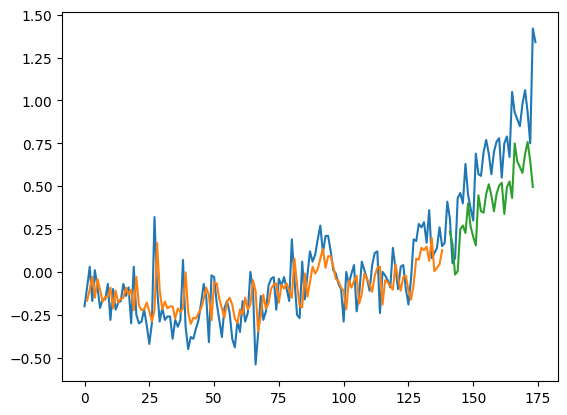

In [163]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()